In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import k_means
from sklearn.metrics import adjusted_mutual_info_score

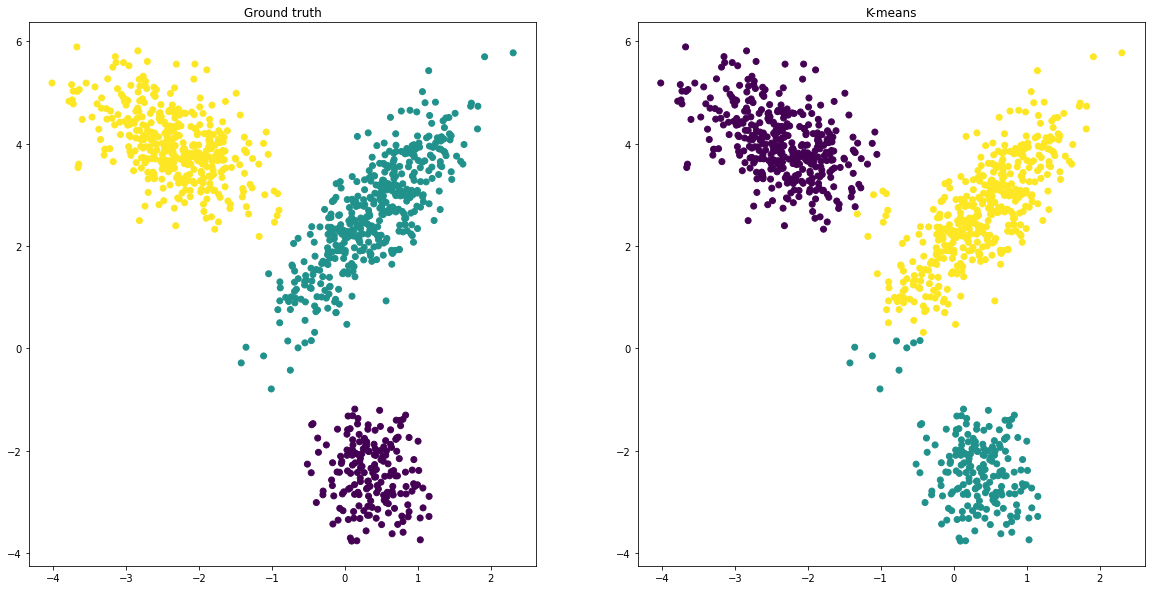

In [2]:
p = np.load('../data/data_new.npy')
hot_start=k_means(p[:, :2], 3)
fig = plt.figure(figsize=(20, 10))
ax0 = fig.add_subplot(121)
ax0.set_title('Ground truth')
ax0.scatter(p[:, 0], p[:, 1], c=p[:, 2])
ax = fig.add_subplot(122)
ax.set_title('K-means')
ax.scatter(p[:, 0], p[:, 1], c=hot_start[1])


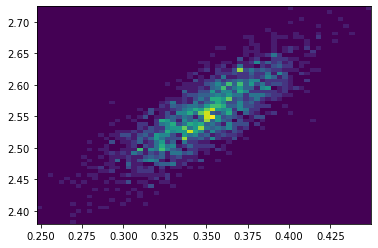

(array([[ nan,  nan,  nan, ...,   1.,  14.,  16.],
        [ nan,  nan,  nan, ...,  17., 129.,  31.],
        [ nan,  nan,  nan, ..., 174., 290.,  28.],
        ...,
        [  8., 178., 389., ...,  nan,  nan,  nan],
        [  7.,  71., 123., ...,  nan,  nan,  nan],
        [ nan,   8.,  10., ...,  nan,  nan,  nan]]),
 array([-2.46899998, -2.43972693, -2.41045389, -2.38118084, -2.35190779,
        -2.32263474, -2.2933617 , -2.26408865, -2.2348156 , -2.20554255,
        -2.17626951, -2.14699646, -2.11772341, -2.08845037, -2.05917732,
        -2.02990427, -2.00063122, -1.97135818, -1.94208513, -1.91281208,
        -1.88353904, -1.85426599, -1.82499294, -1.79571989, -1.76644685,
        -1.7371738 , -1.70790075, -1.67862771, -1.64935466, -1.62008161,
        -1.59080856, -1.56153552, -1.53226247, -1.50298942, -1.47371638,
        -1.44444333, -1.41517028, -1.38589723, -1.35662419, -1.32735114,
        -1.29807809, -1.26880505, -1.239532  , -1.21025895, -1.1809859 ,
        -1.15171286, -

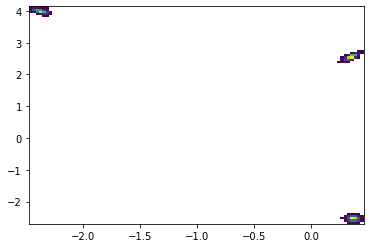

In [10]:
gibbs = np.load('../data/gibbs_sampler.npy', allow_pickle=True).item()
mus=np.array(gibbs['mus'])
plt.hist2d(mus[:,0,0], mus[:,0,1], bins=60)
plt.show()
plt.hist2d(np.hstack([mus[:,0,0], mus[:,1,0], mus[:,2,0]]),np.hstack([mus[:,0,1], mus[:,1,1], mus[:,2,1]]), bins=100, cmin=1 )

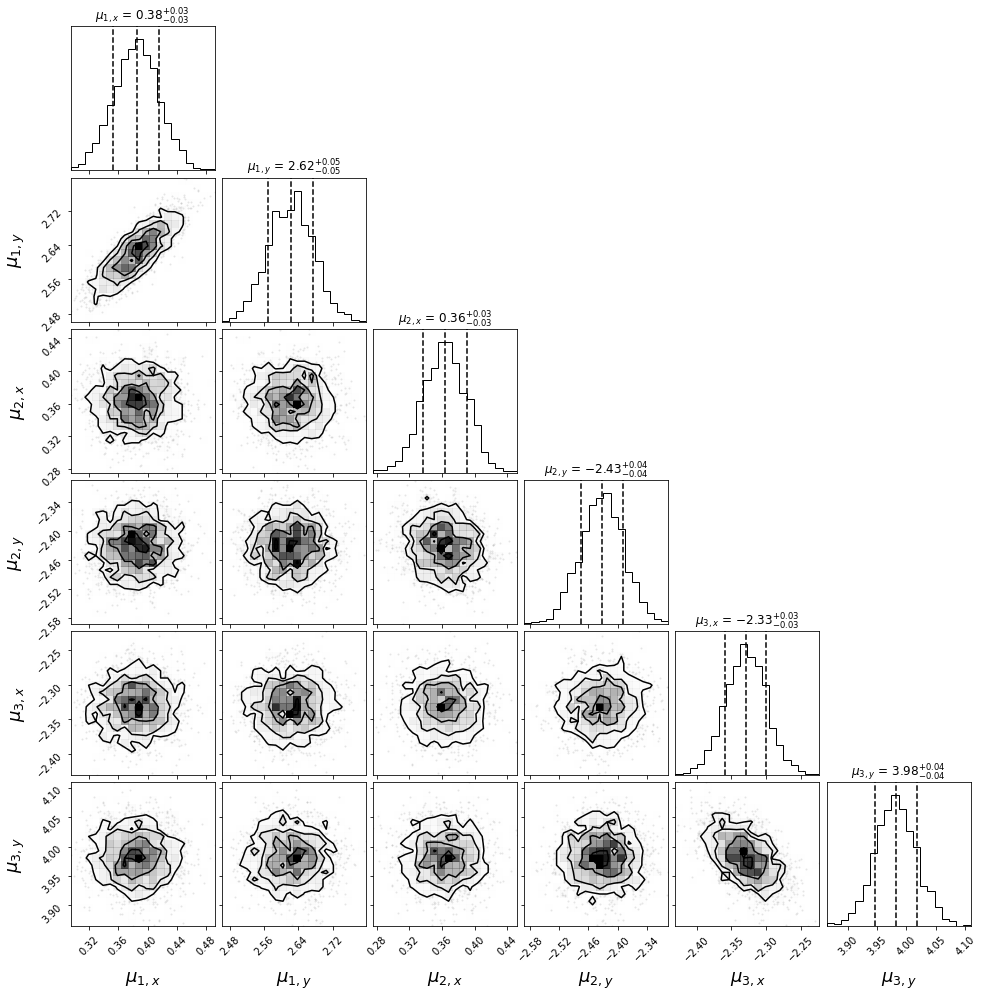

In [10]:
import corner
gibbs = np.load('../data/gibbs_new.npy', allow_pickle=True).item()

figure = corner.corner(np.array(gibbs['mus']).reshape(-1, 6)[100:], 
                       labels=["$\mu_{1,x}$", "$\mu_{1,y}$", "$\mu_{2,x}$", "$\mu_{2,y}$", "$\mu_{3,x}$", "$\mu_{3,y}$"], 
                       show_titles=True, 
                       title_fmt=".2f", 
                       quantiles=[0.16, 0.5, 0.84], 
                       title_kwargs={"fontsize": 12},
                       label_kwargs={"fontsize":18})


In [11]:
cluster1=np.hstack([np.array(gibbs['mus'])[:,0,:], np.array(gibbs['Sigmas'])[:,0,0,:].reshape(-1,2), np.array(gibbs['Sigmas'])[:,0,1,1].reshape(-1,1)])

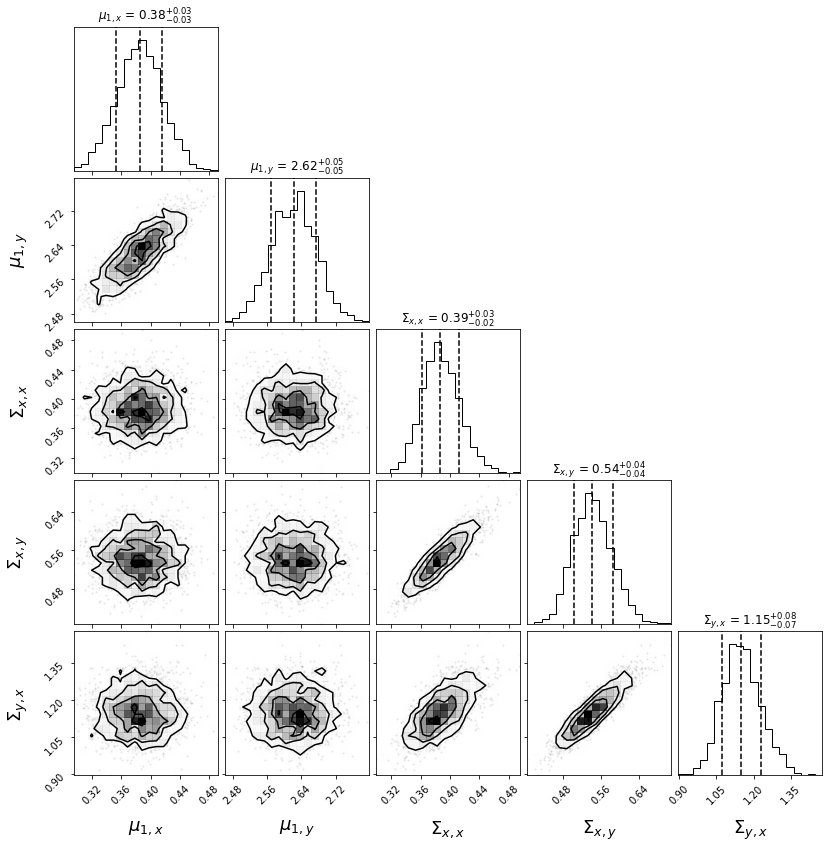

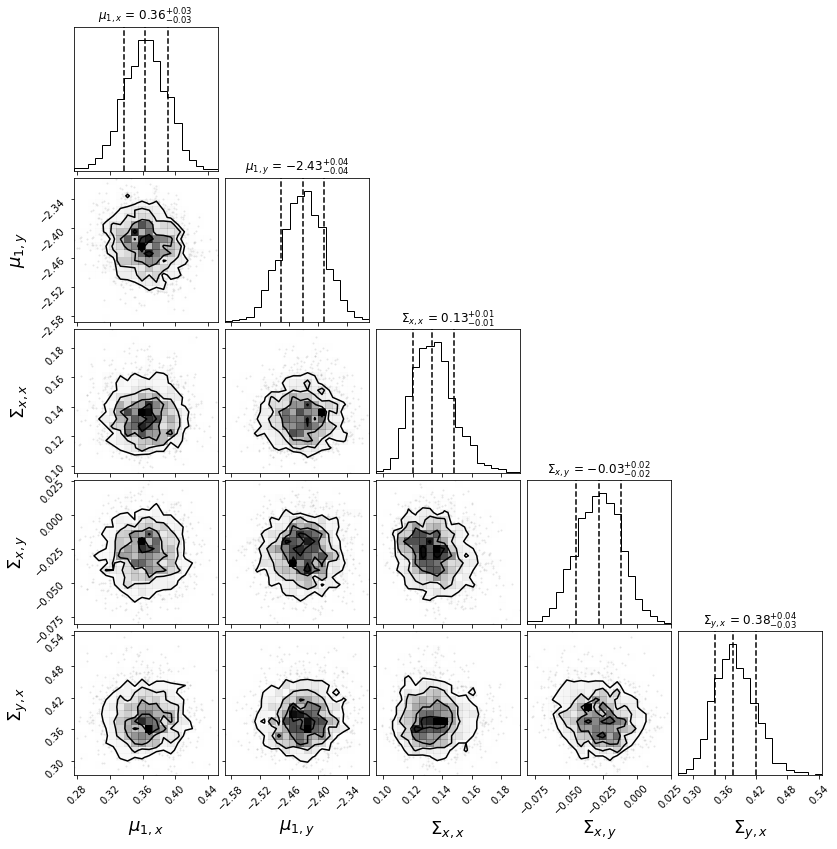

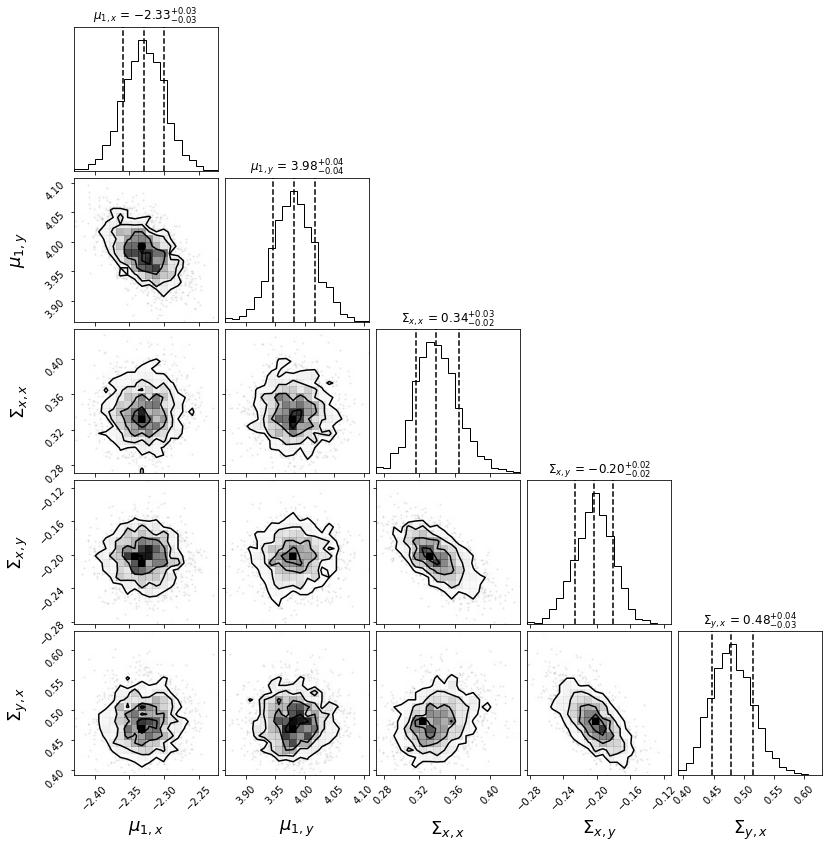

In [12]:
for i in range(3):
    cluster=np.hstack([np.array(gibbs['mus'])[:,i,:], np.array(gibbs['Sigmas'])[:,i,0,:].reshape(-1,2), np.array(gibbs['Sigmas'])[:,i,1,1].reshape(-1,1)])
    figure = corner.corner(cluster[100:], 
                        labels=["$\mu_{1,x}$", "$\mu_{1,y}$", "$\Sigma_{x,x}$", "$\Sigma_{x,y}$", "$\Sigma_{y,x}$"], 
                        show_titles=True, 
                        title_fmt=".2f", 
                        quantiles=[0.16, 0.5, 0.84], 
                        title_kwargs={"fontsize": 12},
                        label_kwargs={"fontsize":18})
    plt.show()

In [13]:
np.array(gibbs['Sigmas']).shape

(2001, 3, 2, 2)

In [14]:
gibbs['zi'].shape, p[:,2].shape

((2001, 1000), (1000,))

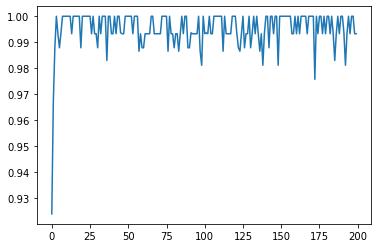

In [16]:
A_m=[]
for i in range(len(gibbs['zi'])):
    A_m.append(adjusted_mutual_info_score(gibbs['zi'][i], p[:,2]))
plt.plot(A_m[:200])

(4001, 4)
(4001, 4)
(4001, 4)


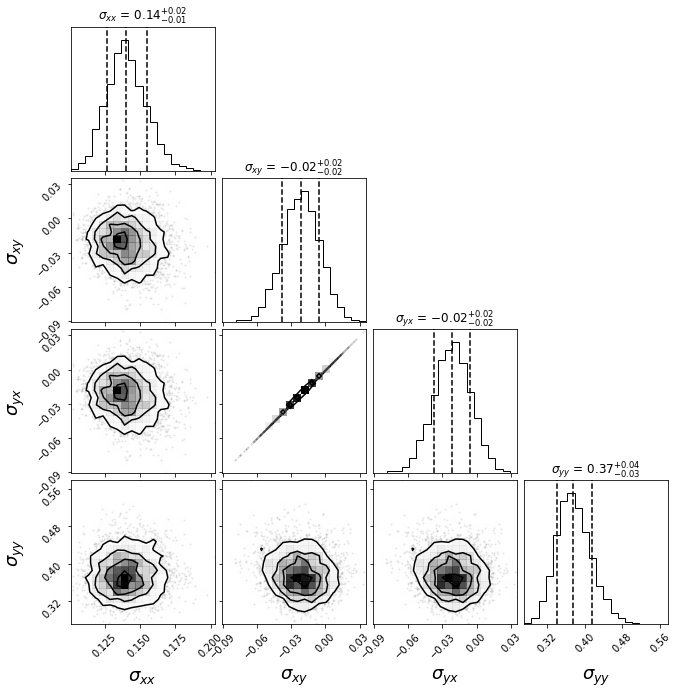

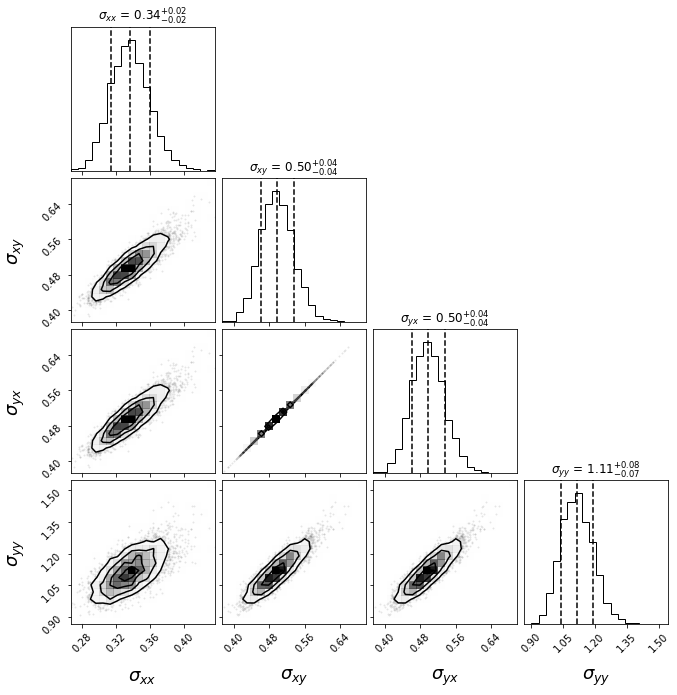

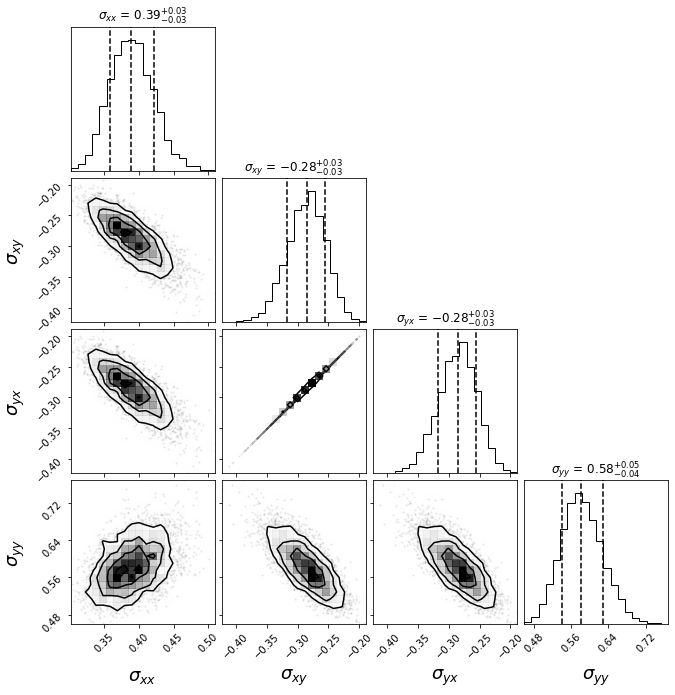

In [77]:
for i in range(3): 
    el=np.array(gibbs['Sigmas'])[:,i,:,:].reshape(-1,4)
    print(el.shape)
    figure = corner.corner(el[200:], 
                       labels=["$\sigma_{xx}$","$\sigma_{xy}$","$\sigma_{yx}$","$\sigma_{yy}$"], 
                       show_titles=True, 
                       title_fmt=".2f", 
                       quantiles=[0.16, 0.5, 0.84], 
                       title_kwargs={"fontsize": 12},
                       label_kwargs={"fontsize":18})

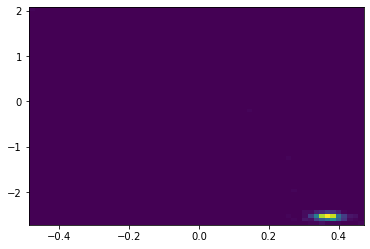

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan,  1.]]),
 array([-2.79775685, -2.76101668, -2.72427651, -2.68753635, -2.65079618,
        -2.61405601, -2.57731584, -2.54057568, -2.50383551, -2.46709534,
        -2.43035518, -2.39361501, -2.35687484, -2.32013468, -2.28339451,
        -2.24665434, -2.20991418, -2.17317401, -2.13643384, -2.09969368,
        -2.06295351, -2.02621334, -1.98947318, -1.95273301, -1.91599284,
        -1.87925268, -1.84251251, -1.80577234, -1.76903218, -1.73229201,
        -1.69555184, -1.65881168, -1.62207151, -1.58533134, -1.54859118,
        -1.51185101, -1.47511084, -1.43837067, -1.40163051, -1.36489034,
        -1.32815017, -1.29141001, -1.25466984, -1.21792967, -1.18118951,
        -1.14444934, -1.10770917, -1.07096901, -1.03422884

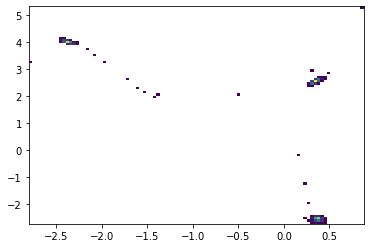

In [33]:
gibbs = np.load('../data/not_hot.npy', allow_pickle=True).item()
mus=np.array(gibbs['mus'])
plt.hist2d(mus[:,0,0], mus[:,0,1], bins=60)
plt.show()
plt.hist2d(np.hstack([mus[:,0,0], mus[:,1,0], mus[:,2,0]]),np.hstack([mus[:,0,1], mus[:,1,1], mus[:,2,1]]), bins=100, cmin=1 )

(array([[nan, nan, nan, ..., nan,  4.,  3.],
        [nan, nan, nan, ...,  3.,  7.,  3.],
        [nan, nan, nan, ..., 12., 15.,  1.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([-2.46480623e+00, -2.43239849e+00, -2.39999076e+00, -2.36758303e+00,
        -2.33517530e+00, -2.30276757e+00, -2.27035984e+00, -2.23795211e+00,
        -2.20554438e+00, -2.17313665e+00, -2.14072892e+00, -2.10832119e+00,
        -2.07591346e+00, -2.04350573e+00, -2.01109800e+00, -1.97869027e+00,
        -1.94628254e+00, -1.91387481e+00, -1.88146708e+00, -1.84905935e+00,
        -1.81665161e+00, -1.78424388e+00, -1.75183615e+00, -1.71942842e+00,
        -1.68702069e+00, -1.65461296e+00, -1.62220523e+00, -1.58979750e+00,
        -1.55738977e+00, -1.52498204e+00, -1.49257431e+00, -1.46016658e+00,
        -1.42775885e+00, -1.39535112e+00, -1.36294339e+00, -1.33053566e+00,
        -1.29812793e+00, -1.265

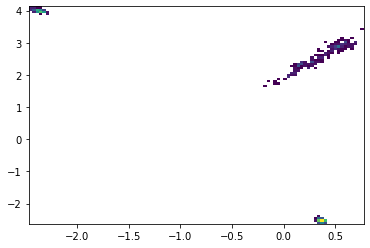

In [8]:
gibbs = np.load('../data/gibbs_4.npy', allow_pickle=True).item()
mus=np.array(gibbs['mus'])
plt.hist2d(np.hstack([mus[:,0,0], mus[:,1,0], mus[:,2,0], mus[:,3,0]]),np.hstack([mus[:,0,1], mus[:,1,1], mus[:,2,1], mus[:,3,1]]), bins=100, cmin=1 )

In [4]:
dirproc = np.load('../data/dirproc.npy', allow_pickle=True).item()

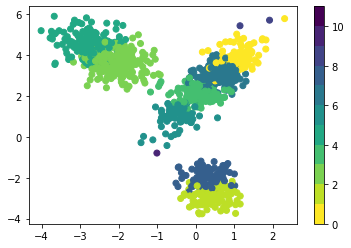

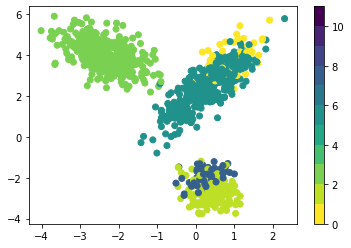

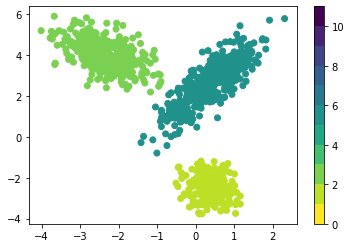

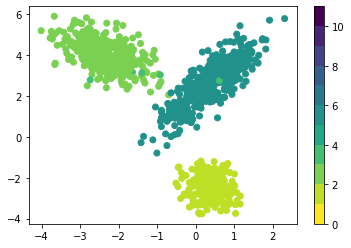

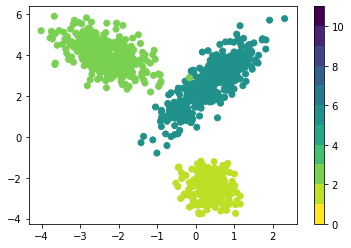

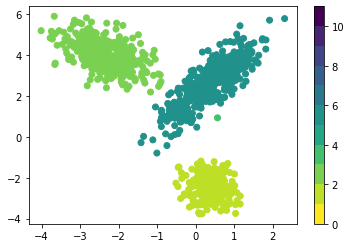

In [72]:
from matplotlib.colors import ListedColormap

# Create a colormap with viridis and range from 0 to 9
cmap = ListedColormap(plt.cm.viridis(np.linspace(1, 0, 11)))

for i in range(0, 600, 100):
    scatter = plt.scatter(p[:, 0], p[:, 1], c=dirproc['assignements'][i], cmap=cmap, vmin=0, vmax=11)
    cbar = plt.colorbar()
    plt.show()

In [49]:
for i in range(0,600,50):
    print(np.unique(dirproc['assignements'][i], return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([ 85,  89, 225, 129, 156,  70, 147,  96,   2,   1]))
(array([ 0,  1,  2,  4,  5,  6,  7,  9, 11], dtype=int32), array([115,  70, 309,  48, 269,  27, 115,   1,  46]))
(array([0, 1, 2, 5, 7], dtype=int32), array([ 51, 119, 384, 380,  66]))
(array([0, 1, 2, 5, 7], dtype=int32), array([  8, 148, 386, 422,  36]))
(array([1, 2, 5], dtype=int32), array([185, 385, 430]))
(array([1, 2, 3, 5], dtype=int32), array([181, 385,   4, 430]))
(array([1, 2, 3, 5], dtype=int32), array([185, 381,   6, 428]))
(array([1, 2, 4, 5], dtype=int32), array([185, 385,   8, 422]))
(array([1, 2, 5], dtype=int32), array([185, 386, 429]))
(array([1, 2, 3, 5], dtype=int32), array([182, 385,   3, 430]))
(array([1, 2, 3, 5], dtype=int32), array([185, 385,   1, 429]))
(array([1, 2, 5], dtype=int32), array([185, 385, 430]))


In [51]:
j=0
for i in range(0,600):
    j=max(j,max(np.unique(dirproc['assignements'][i], return_counts=False)))
print(j)

11


In [76]:
for i in range(11):
    print(i, len(dirproc[f'mu_{i}']))

0 155
1 601
2 601
3 197
4 169
5 601
6 74
7 178
8 33
9 22
10 9


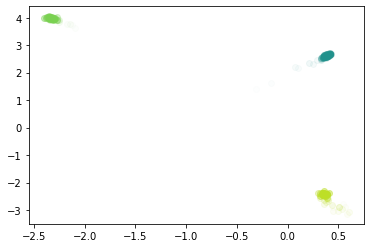

In [77]:
colors = [cmap(i) for i in range(11)]
for i in range(0,600,10):
    for j in [1,2,5]:
        plt.plot(*dirproc[f'mu_{j}'][i],'o', color=colors[j], alpha=0.5*i/600)

In [81]:
print(dirproc.keys())
np.unique(dirproc['assignements'], return_counts=True)

dict_keys(['assignements', 'mu_0', 'Sigma_0', 'mu_1', 'Sigma_1', 'mu_2', 'Sigma_2', 'mu_3', 'Sigma_3', 'mu_4', 'Sigma_4', 'mu_5', 'Sigma_5', 'mu_6', 'Sigma_6', 'mu_7', 'Sigma_7', 'mu_8', 'Sigma_8', 'mu_9', 'Sigma_9', 'mu_10', 'Sigma_10', 'mu_11', 'Sigma_11'])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32),
 array([ 10118,  95824, 224673,   3000,   6264, 240084,   2902,  15273,
           177,     70,     11,   2604]))

In [5]:
dirproc['Sigma_0']

array([[[ 0.13230863,  0.05525194],
        [ 0.05525194,  0.22238414]],

       [[ 0.14452762,  0.05635617],
        [ 0.05635617,  0.22099988]],

       [[ 0.13088953,  0.05420871],
        [ 0.05420871,  0.20310556]],

       [[ 0.09475333,  0.02889034],
        [ 0.02889034,  0.21924842]],

       [[ 0.14116426,  0.02189832],
        [ 0.02189832,  0.215122  ]],

       [[ 0.12097666,  0.03638965],
        [ 0.03638965,  0.20802696]],

       [[ 0.16440115,  0.08793173],
        [ 0.08793173,  0.20922237]],

       [[ 0.17949611,  0.12479934],
        [ 0.12479934,  0.23631292]],

       [[ 0.14498403,  0.08881237],
        [ 0.08881237,  0.25705434]],

       [[ 0.12196599,  0.08352777],
        [ 0.08352777,  0.219439  ]],

       [[ 0.15276596,  0.07136556],
        [ 0.07136556,  0.21505764]],

       [[ 0.15906309,  0.1159068 ],
        [ 0.1159068 ,  0.26550395]],

       [[ 0.14586828,  0.08987854],
        [ 0.08987854,  0.16953797]],

       [[ 0.13675298,  0.10869066],
  

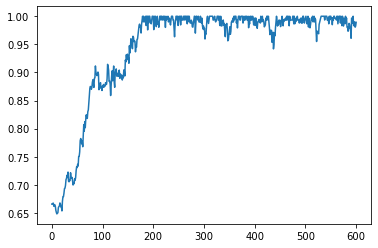

In [6]:
A_m=[]
for i in range(len(dirproc['assignements'])):
    A_m.append(adjusted_mutual_info_score(dirproc['assignements'][i], p[:,2]))
plt.plot(A_m)

In [31]:
burnin=300
clusters_=[]
for i in range(len(dirproc['assignements'][0])):
    order,counts=np.unique(dirproc['assignements'][burnin:,i], return_counts=True)
    clusters_.append(order[np.argmax(counts)])
print(np.unique(clusters_))
print('%.8f' % adjusted_mutual_info_score(clusters_, p[:, 2]))

[1 2 5]
1.00000000


In [31]:
import bilby
result = bilby.result.read_in_result(filename='../outdir/bilby_mcmc_result.pkl')
result2 = bilby.result.read_in_result(filename='../outdir/bilby_mcmc_resume.pickle')

In [20]:
result.plot_corner(
    parameters=["pi_1", "pi_2", "pi_3"]
)
plt.show()
plt.close()

In [36]:
result.log_evidence_err, result.log_evidence, result2.ln_z, result2.rejection_sampling_count

(0.005831225882680839, -12849.953931960223, -12849.953950591704, None)

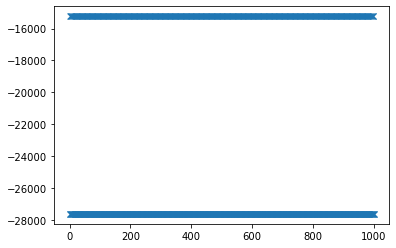

In [28]:
plt.plot(result.log_likelihood_evaluations,'x')

In [42]:
import pandas as pd
import numpy as np
samples_array = np.array(result2.samples)

In [47]:
result2.samples

,pi_1,pi_2,pi_3,mu_x_0,mu_y_0,sigma_xx_0,sigma_yx_0,sigma_xy_0,sigma_yy_0,mu_x_1,...,sigma_xy_1,sigma_yy_1,mu_x_2,mu_y_2,sigma_xx_2,sigma_yx_2,sigma_xy_2,sigma_yy_2,logl,logp
0,0.527362,0.114248,0.35839,0.154572,-2.224091,0.221801,-0.268988,-0.268988,1.431127,-1.167372,...,-0.087151,0.195587,1.112489,-0.195873,1.065428,-0.106170,-0.106170,0.186600,-15229.722024,-inf
1,0.222301,0.599039,0.17866,-0.787131,0.085919,2.510445,0.203372,0.203372,0.178032,-0.779653,...,-0.038448,0.094316,0.543112,0.106070,0.205985,0.107652,0.107652,0.461123,-27622.914073,-inf
2,0.222301,0.599039,0.17866,-0.787131,0.085919,2.510445,0.203372,0.203372,0.178032,-0.779653,...,-0.038448,0.094316,0.543112,0.106070,0.205985,0.107652,0.107652,0.461123,-27622.914073,-inf
3,0.527362,0.114248,0.35839,0.154572,-2.224091,0.221801,-0.268988,-0.268988,1.431127,-1.167372,...,-0.087151,0.195587,1.112489,-0.195873,1.065428,-0.106170,-0.106170,0.186600,-15229.722024,-inf
4,0.222301,0.599039,0.17866,-0.787131,0.085919,2.510445,0.203372,0.203372,0.178032,-0.779653,...,-0.038448,0.094316,0.543112,0.106070,0.205985,0.107652,0.107652,0.461123,-27622.914073,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0.222301,0.599039,0.17866,-0.787131,0.085919,2.510445,0.203372,0.203372,0.178032,-0.779653,...,-0.038448,0.094316,0.543112,0.106070,0.205985,0.107652,0.107652,0.461123,-27622.914073,-inf
998,0.222301,0.599039,0.17866,-0.787131,0.085919,2.510445,0.203372,0.203372,0.178032,-0.779653,...,-0.038448,0.094316,0.543112,0.106070,0.205985,0.107652,0.107652,0.461123,-27622.914073,-inf
999,0.527362,0.114248,0.35839,0.154572,-2.224091,0.221801,-0.268988,-0.268988,1.431127,-1.167372,...,-0.087151,0.195587,1.112489,-0.195873,1.065428,-0.106170,-0.106170,0.186600,-15229.722024,-inf
1000,0.222301,0.599039,0.17866,-0.787131,0.085919,2.510445,0.203372,0.203372,0.178032,-0.779653,...,-0.038448,0.094316,0.543112,0.106070,0.205985,0.107652,0.107652,0.461123,-27622.914073,-inf
